import packages

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

read data

In [0]:
dataset = pd.read_csv('https://raw.githubusercontent.com/machine-learning-course/syllabus/gh-pages/hiw-2019b/dataset-students-ml-2019b.csv')
data = dataset.iloc[:, [6,7]].values

elbow method to find optimal value of n-clusters using inertia

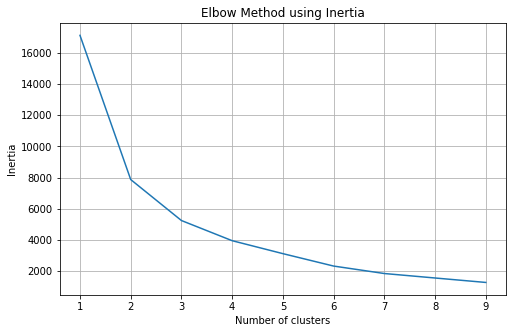

In [69]:
inertia = []
N = range(1,10)
for i in N:
  kmeans = KMeans(n_clusters=i, init = 'k-means++',random_state=0)
  kmeans.fit(data)
  inertia.append(kmeans.inertia_)
plt.plot(N, inertia)
plt.title('Elbow Method using Inertia')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid()
plt.show()

create dendrogram

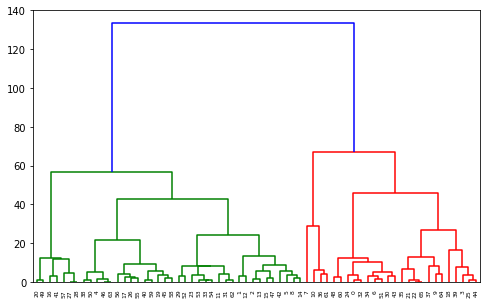

In [70]:
dendrogram = sch.dendrogram(sch.linkage(data, method = 'ward'))

Agglomerative Clustering

In [0]:
hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'ward')

fit dataset and predict

In [0]:
predict = hc.fit_predict(X)

visualize the cluster

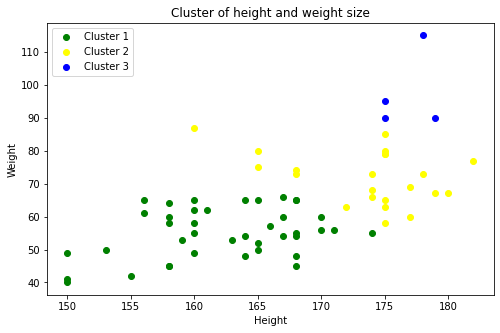

In [73]:
plt.rcParams["figure.figsize"] = (8,5)
colors = ["green", "yellow", "blue"]
for i in range(3):
  plt.scatter(data[predict == i,0], data[predict == i,1], c = colors[i], label = 'Cluster '+str(i+1))
plt.title("Cluster of height and weight size")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.legend(loc="best")
plt.show()